# Exploring RESOLVE/ECO using Seaborn

I downloaded the public Environmental COntext data release 1 (ECO DR1) catalog from the RESOLVE/ECO <a href='http://resolve.astro.unc.edu/'>website</a> (Moffett et al. 2015). The catalog contains archival data of a volume-limited sample of galaxies in the nearby universe. I had downloaded the catalog during the 227th AAS meeting, and on the plane ride back, I decided to make some pretty plots (and familiarize myself with the `pandas` and `seaborn` Python packages).

In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import izip

In [2]:
# The ECO header contains all of the column names (I've kept them consistent with the catalog)
df = pd.read_csv('eco_dr1.txt', delim_whitespace=True, skiprows=56, index_col=0,
                 names=['RAdeg', 'DEdeg', 'cz', 'rMag', 'logM', 'u-r', 'u-J', 'R50', 'R90', 'M', 'FM', 
                        'Grp', 'Grpcz', 'FC', 'logMh', 'Den', 'FA', 'FHI', 'FG', 'CCr', 'CCb'])

## Color-magnitude diagrams

I plot contours of the ECO galaxy $(u-r)^e$ extinction-corrected colors versus their stellar masses. Early types and late types are separated and depicted in red and blue, although note that morphology is *not* a proxy for color. I've computed the kernel density estimation (KDE) of the underlying distribution and not the actual distribution of the galaxies in color-$M_\star$ space.

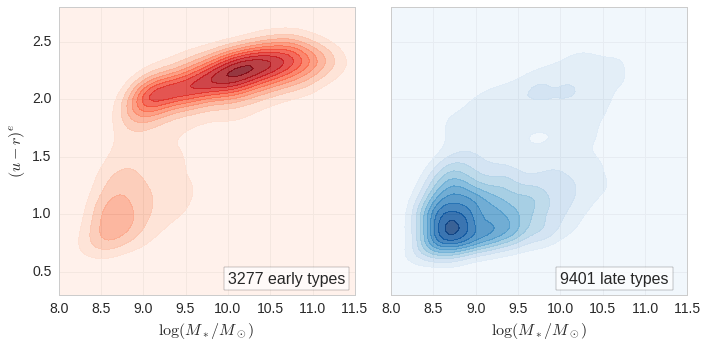

In [4]:
sns.set_style('whitegrid')


# u-r color vs. log(mass) for early- and late-type galaxies
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for ax, cmap, morphology in izip(axes, ['Reds', 'Blues'], ['E', 'L']):
    new_df = df[(df['M'] == morphology) & (df['u-r'] > -5)]
    
    sns.kdeplot(new_df['logM'], new_df['u-r'], shade=True, cmap=cmap, shade_lowest=True, alpha=0.8, ax=ax)
    
    ax.set_xlim(8.0, 11.5)
    ax.set_ylim(0.3, 2.8)
    
    m = 'early' if morphology == 'E' else 'late'

    ax.text(10.0, 0.4, '{} {} types'.format(len(new_df), m), fontsize=16,
            bbox=dict(facecolor='white', alpha=0.7))
    
    ax.set_xlabel(r'$\log(M_*/M_\odot)$', fontsize=16)
    ax.tick_params(labelsize=14)


axes[0].set_ylabel(r'$(u-r)^e$', fontsize=16)
axes[1].set_ylabel('')
plt.tight_layout()

plt.savefig('CMD_morphology.pdf', dpi=300)

## Other interesting trends between $M_\star$, normalized number density ($\Delta$), and $(u-r)^e$ color

Here I've plotted, for *central galaxies only*, $(u-r)^e$ versus stellar mass binned separately by the galaxy's host group mass, $\log M_h/M_\odot$.

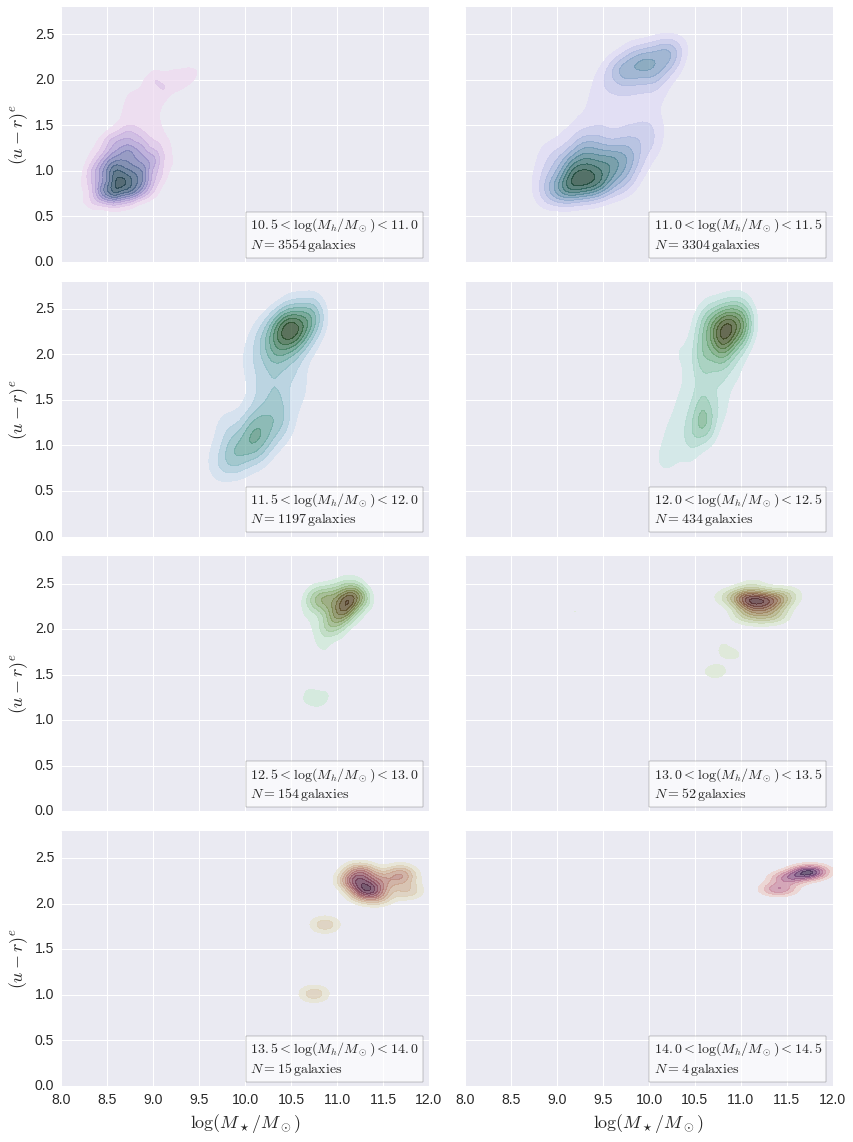

In [5]:
sns.set_style('darkgrid')

# color versus stellar mass in bins of group mass -- centrals
f, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True, sharey=True)

# plots 
for ax, s in izip(axes.flat, range(8)):
    min_Mh = 10.5 + 0.5 * s
    max_Mh = min_Mh + 0.5
        
    cmap = sns.cubehelix_palette(start=(7 - s) / 3., light=1, as_cmap=True)
    
    df_slice = df[(df['logMh'] > min_Mh) & (df['logMh'] < max_Mh) & (df['u-r'] > -5)]
    
    centrals = df_slice[df_slice['FC'] == 1]

    # kernel density estimate
    sns.kdeplot(centrals['logM'], centrals['u-r'], shade=True, cmap=cmap, shade_lowest=False, alpha=0.7, ax=ax)
    
    ax.set_xlim(8.0, 12.0)
    ax.set_ylim(0.0, 2.8)
    
    ax.text(10.05, 0.15, r'${} < \log(M_h/M_\odot) < {}$'.format(min_Mh, max_Mh) + '\n' + r'$N = {} \, \rm galaxies$'.format(len(centrals)), 
            fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

    if s >= 6:
        ax.set_xlabel(r'$\log(M_\star/M_\odot)$', fontsize=18)
    else:
        ax.set_xlabel('')

    if s % 2 == 0:
        ax.set_ylabel(r'$(u-r)^e$', fontsize=18)
    else:
        ax.set_ylabel('')    
    
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('CMD_centrals.pdf', dpi=300)

Here I've plotted the same as above, but now for **satellite galaxies** in the ECO catalog.

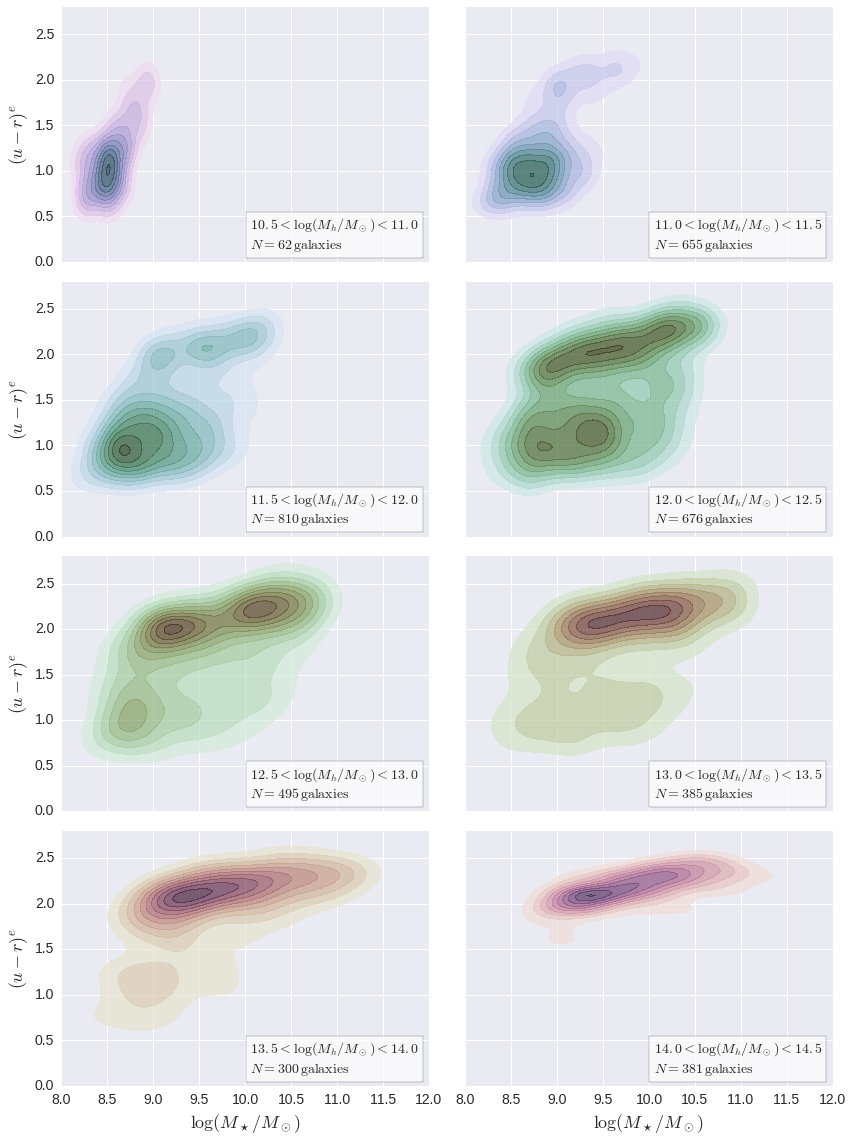

In [6]:
# color versus stellar mass in bins of group mass -- satellite galaxies
f, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True, sharey=True)

# plots 
for ax, s in izip(axes.flat, range(8)):
    min_Mh = 10.5 + 0.5 * s
    max_Mh = min_Mh + 0.5
        
    cmap = sns.cubehelix_palette(start=(7 - s) / 3., light=1, as_cmap=True)
    
    df_slice = df[(df['logMh'] > min_Mh) & (df['logMh'] < max_Mh) & (df['u-r'] > -5)]
    
    satellites = df_slice[df_slice['FC'] == 0]

    # kernel density estimate
    sns.kdeplot(satellites['logM'], satellites['u-r'], shade=True, cmap=cmap, shade_lowest=False, alpha=0.7, ax=ax)
    
    ax.set_xlim(8.0, 12.0)
    ax.set_ylim(0.0, 2.8)
    
    ax.text(10.05, 0.15, r'${} < \log(M_h/M_\odot) < {}$'.format(min_Mh, max_Mh) + '\n' + r'$N = {} \, \rm galaxies$'.format(len(satellites)), 
            fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

    if s >= 6:
        ax.set_xlabel(r'$\log(M_\star/M_\odot)$', fontsize=18)
    else:
        ax.set_xlabel('')

    if s % 2 == 0:
        ax.set_ylabel(r'$(u-r)^e$', fontsize=18)
    else:
        ax.set_ylabel('')    
    
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('CMD_satellites.pdf', dpi=300)

In the next figure, I've plotted the $(u-r)^e$ color against density, separated into bins of stellar mass.

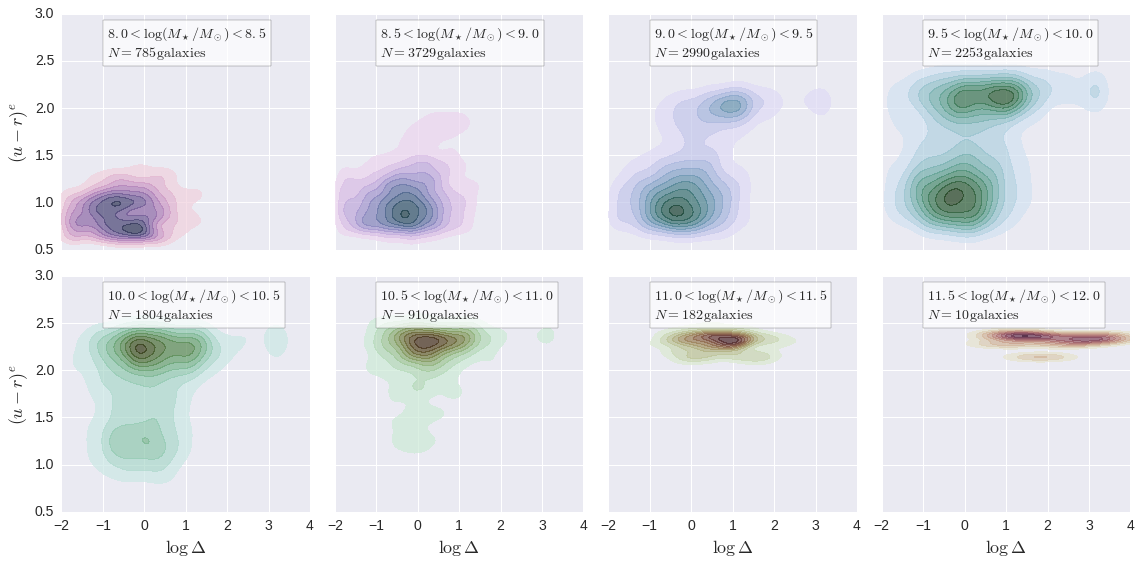

In [7]:
# color versus normalized galaxy density, in bins of stellar mass
f, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)

# plots 
for ax, s in izip(axes.flat, range(8)):
    min_M = 8.0 + 0.5 * s
    max_M = min_M + 0.5
        
    cmap = sns.cubehelix_palette(start=(8 - s) / 3., light=1, as_cmap=True)
    
    dfx = df[df['Den'] > 0]
    
    df_slice = dfx[(dfx['logM'] > min_M) & (dfx['logM'] < max_M) & (dfx['u-r'] > -5)]
    
    # kernel density estimate
    sns.kdeplot(np.log(df_slice['Den']), df_slice['u-r'], shade=True, cmap=cmap, shade_lowest=False, alpha=0.7, ax=ax)
    
    ax.set_xlim(-2.0, 4.0)
    ax.set_ylim(0.5, 3.0)
    
    ax.text(-0.9, 2.55, r'${} < \log(M_\star/M_\odot) < {}$'.format(min_M, max_M) + '\n' +r'$N = {} \rm\, galaxies$'.format(len(df_slice)), 
            fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

    if s >= 4:
        ax.set_xlabel(r'$\log\, \Delta$', fontsize=18)
    else:
        ax.set_xlabel('')

    if s % 4 == 0:
        ax.set_ylabel(r'$(u-r)^e$', fontsize=18)
    else:
        ax.set_ylabel('')    
    
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('color_vs_density_stellarmass_binned.pdf', dpi=300)

Finally I've plotted $M_\star$ versus number density in bins of color. This is the only figure in which the contour colors actually corresponded to the $(u-r)^e$ extinction-corrected color.

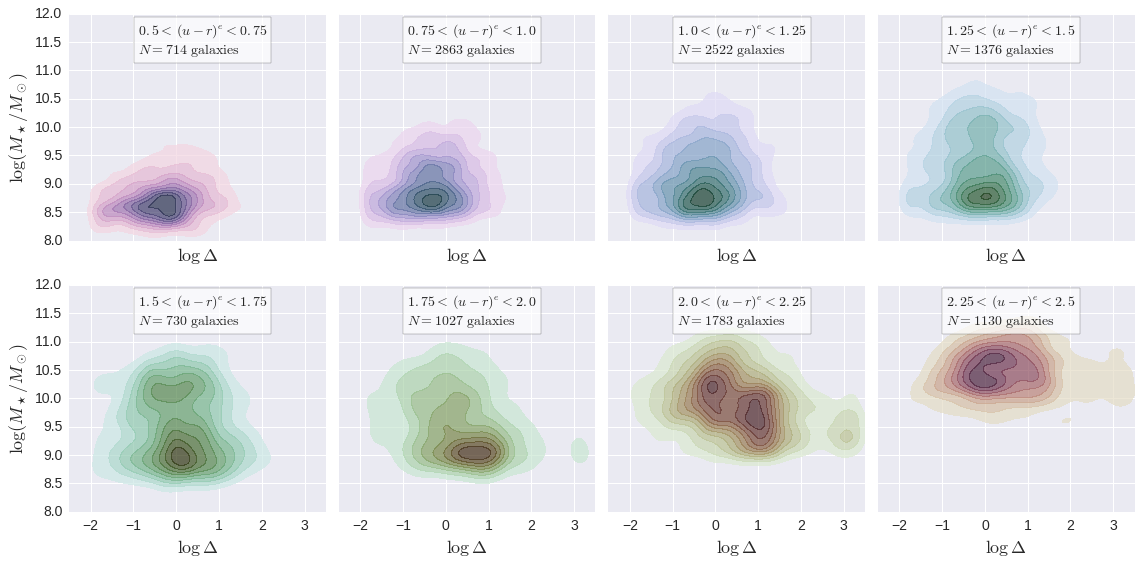

In [8]:
# stellar mass versus normalized galaxy density, in bins of color
f, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)


# plots 
for ax, s in izip(axes.flat, range(8)):
    min_umr = 0.5 + 0.25 * s
    max_umr = min_umr + 0.25
        
    cmap = sns.cubehelix_palette(start=(8 - s) / 3., light=1, as_cmap=True)
    
    dfx = df[np.logical_and(df['Den'] > 0, df['u-r'] > -5)]
    
    df_slice = dfx[np.logical_and(dfx['u-r'] > min_umr, dfx['u-r'] < max_umr)]
    
    # kernel density estimate
    sns.kdeplot(np.log(df_slice['Den']), df_slice['logM'], shade=True, cmap=cmap, shade_lowest=False, alpha=0.7, ax=ax)
    
    ax.set_xlim(-2.5, 3.5)
    ax.set_ylim(8., 12.)
    
    ax.text(-0.9, 11.3, r'${} < \,(u-r)^e < {}$'.format(min_umr, max_umr) + '\n' +r'$N = {} \ \rm galaxies$'.format(len(df_slice)), 
            fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

    
    ax.set_xlabel(r'$\log\, \Delta$', fontsize = 18)

    if s % 4 == 0:
        ax.set_ylabel(r'$\log(M_\star/M_\odot)$', fontsize = 18)
    else:
        ax.set_ylabel('')    
    
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('logM_vs_density_color_binned_2.pdf', dpi = 300)

## Classifying morphology 

I also decided to briefly foray into using `scikit-learn` to try to classify by morphology.

First I'll try to do so by using $r$ (SDSS absolute $r$ magnitude), $M_\star$, $(u-r)^e$, modeled-estimated $u-J$, and the normalized density, $\Delta$, to train a quick decision tree.

In [96]:
# Load useful data and make sure it's nice and clean

eco = df[['rMag', 'logM', 'u-r', 'u-J', 'M', 'Den']]
eco_clean = eco[(eco['rMag'] < 0) &
                (eco['Den'] > 0) &
                (eco['u-r'] > -5.0) &
                (eco['u-J'] > -5.0) &
                (eco['M'] != '-')]

eco_clean.head()

,rMag,logM,u-r,u-J,M,Den
ECO12079,-18.80,8.91,0.88,2.06,L,0.19
ECO02120,-20.82,10.23,1.31,3.31,L,0.24
ECO08137,-17.87,8.95,1.84,3.42,E,0.67
ECO00569,-18.03,8.81,0.76,1.97,L,0.74
ECO10139,-18.99,9.23,1.18,2.30,L,0.57


In [97]:
# Set up for the decision tree training

eco_inputs  = eco_clean[['rMag', 'logM', 'u-r', 'u-J', 'Den']].values
eco_classes = eco_clean['M'].values

eco_inputs[:5]

array([[-18.8 ,   8.91,   0.88,   2.06,   0.19],
       [-20.82,  10.23,   1.31,   3.31,   0.24],
       [-17.87,   8.95,   1.84,   3.42,   0.67],
       [-18.03,   8.81,   0.76,   1.97,   0.74],
       [-18.99,   9.23,   1.18,   2.3 ,   0.57]])

In [98]:
# split training data from testing data
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(eco_inputs, eco_classes, train_size=0.75, random_state=1)

In [99]:
from sklearn.tree import DecisionTreeClassifier

# make classifier
decision_tree_classifier = DecisionTreeClassifier()

# fit classifier
decision_tree_classifier.fit(training_inputs, training_classes)

# see how well we did
decision_tree_classifier.score(testing_inputs, testing_classes)

0.77674567584881482

77% is not that great. I'm feel like we can do better than that, so let's explore the parameter space by using a grid search and tweak the number of `features` and also `depth` of the decision tree.

In [100]:
from sklearn.cross_validation import StratifiedKFold 
from sklearn.grid_search import GridSearchCV


# re-initiate the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# define a parameter space
parameter_grid = {'max_depth': [2, 3, 4, 5, 6],
                  'max_features': [1, 2, 3, 4]}

#  cross-validate 10 subsets to ensure a representative decision tree is built
cross_validation = StratifiedKFold(eco_classes, n_folds=10)

# search for best parameters and then fit
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(eco_inputs, eco_classes)

# print results
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.830436523829
Best parameters: {'max_features': 3, 'max_depth': 5}


That was better, but not by much. 83% might be near the asymptotic accuracy. Let's illustrate this to check...

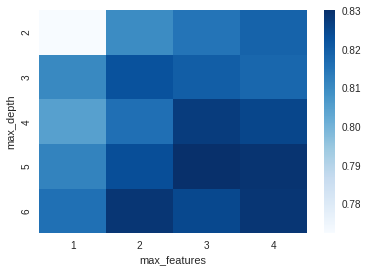

In [101]:
# I totally took this part from the example machine learning notebook written by Randal S. Olson and Jason H. Moore.

grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Right, so we're not seeing substantial improvement with a lot more depth. Interestingly, even having more than two features doesn't seem to make a huge difference (my guess is that $(u-r)^e$ and $M_\star$ are the primary predictors).

I'm going to try the KMeans clustering alogrithm, another tool in the `scikit-learn` library. 

*Afternote: I'm not sure how the KMeans method computes its scoring. I'll need to check up on it. Also, I need to optimize the parameters too.*

In [95]:
from sklearn.cluster import KMeans

# make the KMeans clustering class
kmeans_clusterer = KMeans(n_clusters = 2)

kmeans_clusterer.fit(eco_inputs, eco_classes)

y = kmeans_clusterer.transform(eco_inputs)
eco_classes

array(['L', 'L', 'E', ..., 'L', 'E', 'E'], dtype=object)

In [102]:
# search parameter space (NOTE: MIGHT TAKE AWHILE SO I'M SKIPPING THIS FOR NOW)
parameter_grid = {'n_clusters': [6, 8, 10],
                  'max_iter': [100, 300, 500],
                  'n_init': [10, 20],
                  'tol': [1e-4, 3e-4, 1e-3]}

cross_validation = StratifiedKFold(eco_classes, n_folds=10)

grid_search = GridSearchCV(kmeans_clusterer,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# fit to my data and print out the scores
grid_search.fit(eco_inputs, eco_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# this prints out the handy-dandy function call!
grid_search.best_estimator_

KeyboardInterrupt: 

Let's look in at the distribution in the first three principal components too, just for fun.

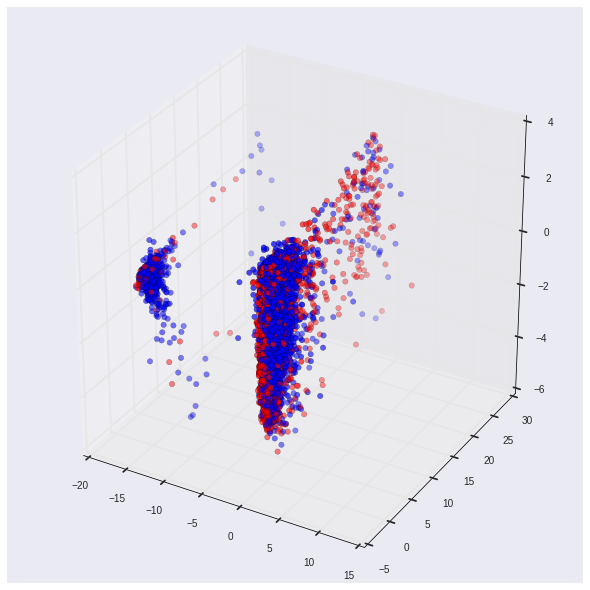

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

pca.fit(eco_inputs)

X = pca.transform(eco_inputs)
y = [0 if m == 'L' else 1 for m in eco_classes]

# if you do %matplotlib qt, you can see rotate around the data in the 3 dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           s = 30,
           alpha = 0.8,
           c = ['r' if yi==1 else 'b' for yi in y])


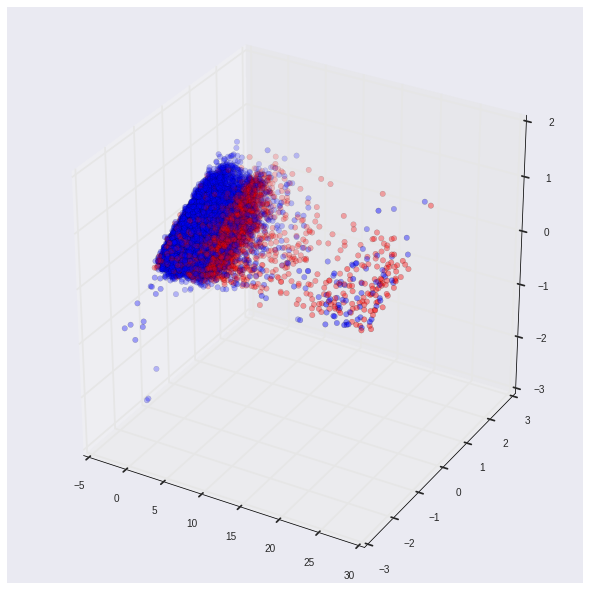

In [104]:
# Above is cool. I'm guessing that the u-J color dominates one of the principal components.
# Some u-J model values are strangely high (probably for very blue things such as AGN). So
# I'm going to remove that column:

eco_reduced_inputs = eco_clean[['logM', 'u-r', 'Den']].values

pca = PCA(n_components = 3)

pca.fit(eco_reduced_inputs)

X = pca.transform(eco_reduced_inputs)
y = [0 if m == 'L' else 1 for m in eco_classes]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           s = 30,
           alpha = 0.5,
           c = ['r' if yi==1 else 'b' for yi in y])


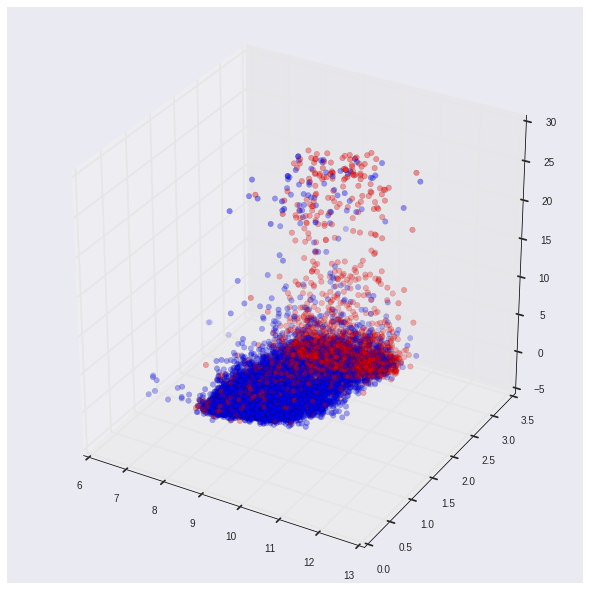

In [105]:
# Now for comparison, this is just the ECO data (minus u-J info) without any PCA

X = eco_reduced_inputs
y = [0 if m == 'L' else 1 for m in eco_classes]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           s = 30,
           alpha = 0.5,
           c = ['r' if yi==1 else 'b' for yi in y])